In [ ]:
# import numpy as np
# import pandas as pd
# from sklearn.preprocessing import MinMaxScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
# from tensorflow.keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt

# # Load your 5-minute interval stock data
# # Assuming a DataFrame 'data' with columns: 'open', 'high', 'low', 'close', 'Volume'
# data = pd.read_csv('/content/FX_XAUUSD, 5 - 3 UTC Month.csv')

# # Preprocess data
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(data[['open', 'high', 'low', 'close', 'Volume']])

# # Prepare input sequences
# def create_sequences(data, seq_length=60):
#     X, y = [], []
#     for i in range(seq_length, len(data)):
#         X.append(data[i-seq_length:i, :])
#         y.append(data[i, :])  # Include all five features as target
#     return np.array(X), np.array(y)

# # Set sequence length (e.g., 60 data points, or 5 hours)
# seq_length = 600
# X, y = create_sequences(scaled_data, seq_length)

# # Split data into training and testing sets
# train_size = int(len(X) * 0.8)
# X_train, X_test = X[:train_size], X[train_size:]
# y_train, y_test = y[:train_size], y[train_size:]

# # Build the LSTM model
# model = Sequential([
#     LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
#     Dropout(0.2),
#     LSTM(50, return_sequences=False),
#     Dropout(0.2),
#     Dense(25),
#     Dense(5)  # Output layer for all five features
# ])

# # Compile model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Train the model
# early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

# # Make predictions
# predictions = model.predict(X_test)

# # Rescale predictions back to original scale
# # Add zero columns for features to transform, then keep only the relevant columns after inverse transform
# predictions_rescaled = scaler.inverse_transform(predictions)
# y_test_rescaled = scaler.inverse_transform(y_test)

# # Print predictions and actuals
# print("Predicted values (Open, High, Low, Close, Volume):\n", predictions_rescaled[:5])
# print("Actual values (Open, High, Low, Close, Volume):\n", y_test_rescaled[:5])

# # Plotting the close price for comparison
# plt.figure(figsize=(14,5))
# plt.plot(y_test_rescaled[:, 3], color='blue', label='Actual Close Prices')
# plt.plot(predictions_rescaled[:, 3], color='red', label='Predicted Close Prices')
# plt.title('Stock Price Prediction (Close Price)')
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()


In [ ]:
# def predict_future(data, model, seq_length, future_steps=12):
#     # Use the latest 'seq_length' data points as initial input
#     prediction_sequence = list(data[-seq_length:])

#     # Container for future predictions
#     future_predictions = []

#     for _ in range(future_steps):
#         # Prepare the data for prediction (shape: 1, seq_length, num_features)
#         input_sequence = np.array(prediction_sequence[-seq_length:]).reshape(1, seq_length, data.shape[1])

#         # Predict the next 5-minute interval
#         next_prediction = model.predict(input_sequence)

#         # Append prediction to the list
#         future_predictions.append(next_prediction[0, 0])  # Only keep 'close' value if targeting close price

#         # Append prediction to the sequence, and shift it
#         prediction_sequence.append(np.concatenate([input_sequence[0, -1, :-1], next_prediction[0]]))

#     # Convert future predictions back to original scale
#     future_predictions_rescaled = scaler.inverse_transform(
#         np.concatenate([np.zeros((len(future_predictions), 4)), np.array(future_predictions).reshape(-1, 1)], axis=1)
#     )[:, 3]

#     return future_predictions_rescaled

# # Predict the next 1 hour (12 steps of 5-minute intervals)
# future_steps = 12  # For 1 hour (12 * 5 minutes)
# future_predictions = predict_future(scaled_data, model, seq_length, future_steps)

# # Display future predictions
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 5))
# plt.plot(future_predictions, color='orange', label='Future Predictions (Next 1 Hour)')
# plt.title('Future Stock Price Prediction (Next Hour)')
# plt.xlabel('5-minute intervals')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.show()

In [ ]:
# def predict_future(data, model, seq_length, future_steps=12):
#     # Use the latest 'seq_length' data points as initial input
#     prediction_sequence = list(data[-seq_length:])

#     # Container for future predictions (each will have all five values)
#     future_predictions = []

#     for _ in range(future_steps):
#         # Prepare the data for prediction (shape: 1, seq_length, num_features)
#         input_sequence = np.array(prediction_sequence[-seq_length:]).reshape(1, seq_length, data.shape[1])

#         # Predict the next 5-minute interval
#         next_prediction = model.predict(input_sequence)

#         # Append the complete prediction (all five values) to the list
#         future_predictions.append(next_prediction[0])  # Contains [open, high, low, close, volume]

#         # Append the new prediction to the sequence for the next input step
#         # We use all five features here to match the input shape
#         prediction_sequence.append(next_prediction[0])

#     # Convert future predictions back to original scale for all five features
#     future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions))

#     return future_predictions_rescaled

# # Predict the next 1 hour (12 steps of 5-minute intervals)
# future_steps = 12  # For 1 hour (12 * 5 minutes)
# future_predictions = predict_future(scaled_data, model, seq_length, future_steps)

# # Display the 'close' price predictions for visualization
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 5))
# plt.plot(future_predictions[:, 3], color='orange', label='Future Close Price Predictions (Next 1 Hour)')
# plt.title('Future Stock Price Prediction (Next Hour)')
# plt.xlabel('5-minute intervals')
# plt.ylabel('Close Price')
# plt.legend()
# plt.show()

# # Display all predictions
# print("Future Predictions (Open, High, Low, Close, Volume):")
# print(future_predictions)


In [ ]:
# import numpy as np

# def predict_future_multi_features(data, model, seq_length, future_steps=12):
#     # Initialize prediction sequence with the latest 'seq_length' data points
#     prediction_sequence = list(data[-seq_length:])

#     # Container to store predictions for each 5-minute interval
#     future_predictions = []

#     for _ in range(future_steps):
#         # Prepare input sequence for the model (shape: 1, seq_length, num_features)
#         input_sequence = np.array(prediction_sequence[-seq_length:]).reshape(1, seq_length, data.shape[1])

#         # Predict the next 5-minute interval values for all five features
#         next_prediction = model.predict(input_sequence)

#         # Append this prediction to the future predictions list
#         future_predictions.append(next_prediction[0])  # Contains [open, high, low, close, volume] for the interval

#         # Update prediction_sequence with the new prediction for the next step
#         prediction_sequence.append(next_prediction[0])

#     # Rescale predictions back to the original scale for each feature
#     future_predictions_rescaled = scaler.inverse_transform(np.array(future_predictions))

#     return future_predictions_rescaled

# # Predict the next hour (12 intervals of 5-minute steps)
# future_steps = 12  # Predicting the next hour in 5-minute intervals
# future_predictions = predict_future_multi_features(scaled_data, model, seq_length, future_steps)

# # Display the predicted values for each 5-minute interval in the next hour
# for i, prediction in enumerate(future_predictions, start=1):
#     print(f"5-minute Interval {i}: Open={prediction[0]:.2f}, High={prediction[1]:.2f}, Low={prediction[2]:.2f}, Close={prediction[3]:.2f}, Volume={prediction[4]:.2f}")


In [ ]:
# data.shape

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 68s 111ms/step - loss: 0.0055 - val_loss: 4.3549e-04
Epoch 2/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 79s 112ms/step - loss: 6.6829e-04 - val_loss: 4.2990e-04
Epoch 3/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - loss: 5.5128e-04 - val_loss: 6.6563e-04
Epoch 4/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 82s 111ms/step - loss: 4.9107e-04 - val_loss: 9.5553e-04
Epoch 5/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 82s 111ms/step - loss: 5.3609e-04 - val_loss: 7.2375e-04
Epoch 6/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - loss: 5.7619e-04 - val_loss: 0.0020
Epoch 7/10
556/556 ━━━━━━━━━━━━━━━━━━━━ 82s 110ms/step - loss: 5.5208e-04 - val_loss: 9.0286e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

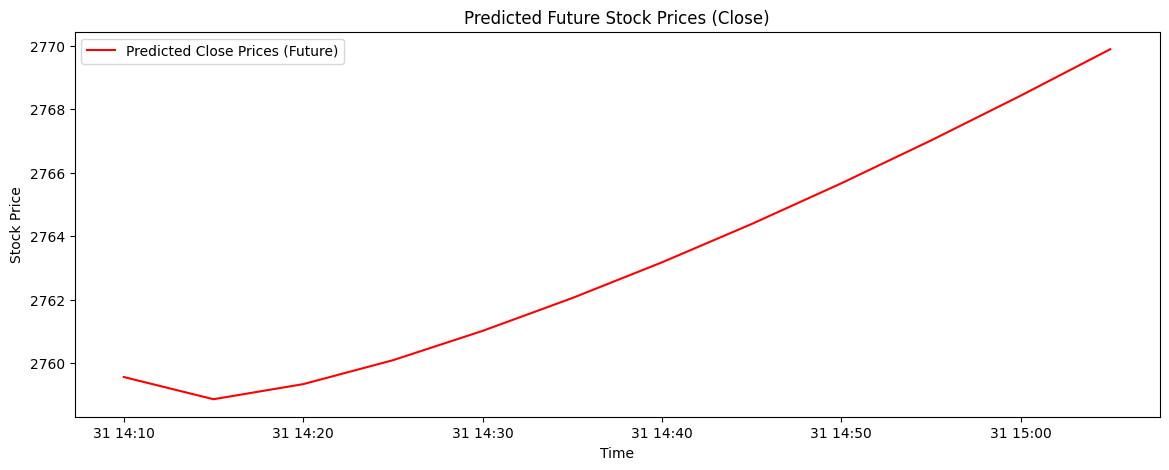

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from datetime import timedelta
from datetime import datetime, timedelta
import pytz
from dateutil.relativedelta import relativedelta

# Load your 5-minute interval stock data with a UTC time column
data = pd.read_csv('/content/FX_XAUUSD, 5 - 3 UTC Month.csv', parse_dates=['time'])
data.set_index('time', inplace=True)

# Preprocess data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['open', 'high', 'low', 'close', 'Volume']])

# Prepare input sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, :])
        y.append(data[i, :])  # Include all five features as target
    return np.array(X), np.array(y)

# Set sequence length (e.g., 60 data points, or 5 hours)
seq_length = 540
X, y = create_sequences(scaled_data, seq_length)

# Split data into training and testing sets
train_size = int(len(X) * 0.9)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(512, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(256, return_sequences=False),
    Dropout(0.2),
    Dense(128),
    Dense(25),
    Dense(5)  # Output layer for all five features
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[early_stopping])

# Predict the next 1 hour of data in 5-minute intervals
last_sequence = X_test[-1]  # Start with the last sequence of the test set
future_predictions = []
future_times = []

# Generate predictions for the next hour (12 predictions for 5-minute intervals)
for i in range(12):
    next_pred = model.predict(last_sequence.reshape(1, seq_length, -1))
    future_predictions.append(next_pred[0])

    # Update the last sequence with the new prediction
    last_sequence = np.append(last_sequence[1:], [next_pred[0]], axis=0)

    # Calculate future timestamps based on the last known timestamp in data
    last_time = data.index[-1] if i == 0 else future_times[-1]
    future_times.append(last_time + timedelta(minutes=5))

# Rescale predictions back to original scale
future_predictions_rescaled = scaler.inverse_transform(future_predictions)

# Convert predictions to a DataFrame for better readability
predicted_df = pd.DataFrame(future_predictions_rescaled, columns=['open', 'high', 'low', 'close', 'Volume'], index=future_times)

# Print the predicted future values
print("Predicted future values (Open, High, Low, Close, Volume):\n", predicted_df)

# Plotting the predicted future close prices
plt.figure(figsize=(14,5))
plt.plot(predicted_df.index, predicted_df['close'], color='red', label='Predicted Close Prices (Future)')
plt.title('Predicted Future Stock Prices (Close)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [ ]:
# Define the Chicago timezone
chicago_tz = pytz.timezone('America/Chicago')

predicted_df.index = predicted_df.index.tz_convert(chicago_tz)

In [ ]:
predicted_df

,open,high,low,close,Volume
2024-10-31 09:10:00-05:00,2758.271640,2760.366005,2755.510057,2759.558054,8402.872447
2024-10-31 09:15:00-05:00,2757.719519,2759.581052,2755.102176,2758.858748,7801.787547
2024-10-31 09:20:00-05:00,2758.245808,2759.979220,2755.689689,2759.334280,7584.327729
2024-10-31 09:25:00-05:00,2759.038768,2760.651647,2756.542817,2760.087714,7381.927287
2024-10-31 09:30:00-05:00,2759.993075,2761.501082,2757.549722,2761.012324,7209.100612
2024-10-31 09:35:00-05:00,2761.051487,2762.467215,2758.654797,2762.046435,7054.494929
2024-10-31 09:40:00-05:00,2762.197900,2763.532003,2759.842529,2763.172100,6914.621734
2024-10-31 09:45:00-05:00,2763.423806,2764.685332,2761.105201,2764.380136,6787.661340
2024-10-31 09:50:00-05:00,2764.722203,2765.919167,2762.436212,2765.662867,6672.570479
2024-10-31 09:55:00-05:00,2766.086139,2767.225494,2763.829275,2767.013239,6568.575298
